In [42]:
import pandas as pd
from finta import TA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./bitcoin_2010-07-24_2023-08-23.csv")
df['Start']=pd.to_datetime(df['Start'])
df.set_index('Start',inplace=True)
df.sort_index(ascending=True,inplace=True)
df.drop('End',axis=1,inplace=True)
df

,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,
2010-07-24,0.0545,0.0545,0.0545,0.0545,0.000000e+00,0.000000e+00
2010-07-25,0.0505,0.0505,0.0505,0.0505,0.000000e+00,0.000000e+00
2010-07-26,0.0560,0.0560,0.0560,0.0560,0.000000e+00,0.000000e+00
2010-07-27,0.0600,0.0600,0.0600,0.0600,0.000000e+00,0.000000e+00
2010-07-28,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
2023-08-18,26659.8500,26784.2300,25721.5300,26058.2600,7.032831e+10,5.115170e+11
2023-08-19,26069.2300,26253.2600,25814.2500,26090.6300,4.769626e+10,5.060530e+11
2023-08-20,26085.1800,26267.3300,26002.0300,26180.0000,3.624048e+10,5.084380e+11


In [3]:
# Calculate ADX
df['ADX'] = TA.ADX(df)

# Calculate RSI
df['RSI'] = TA.RSI(df)

# Calculate Bollinger Bands
bollinger_bands = TA.BBANDS(df)
df['BollingerUpper'] = bollinger_bands['BB_UPPER']
df['BollingerMiddle'] = bollinger_bands['BB_MIDDLE']
df['BollingerLower'] = bollinger_bands['BB_LOWER']

df.dropna(inplace=True)

In [4]:
def label_market(df, criteria):
    df['MarketLabel'] = 0
    indices = df.index.tolist()
    
    for i in range(len(indices)):
        current_index = indices[i]
        trendy_count = 0
        
        if df.loc[current_index, 'ADX'] > 25:
            trendy_count += 1
        
        if df.loc[current_index, 'RSI'] < 30 or df.loc[current_index, 'RSI'] > 70:
            trendy_count += 1

        if i > 0:
            previous_index = indices[i-1]
            current_width = df.loc[current_index, 'BollingerUpper'] - df.loc[current_index, 'BollingerLower']
            previous_width = df.loc[previous_index, 'BollingerUpper'] - df.loc[previous_index, 'BollingerLower']
            
            if current_width > previous_width:
                trendy_count += 1

        if trendy_count >= criteria:
            df.loc[current_index, 'MarketLabel'] = 1  # Trendy
            
    return df

In [5]:
def plot_colored_market_trends(df):
    fig, ax = plt.subplots()
    prev_price = df['Close'].iloc[0]
    prev_date = df.index[0]
    prev_label = df['MarketLabel'].iloc[0]

    for date, row in df.iterrows():
        current_price = row['Close']
        current_label = row['MarketLabel']
        
        color = 'g' if current_label == 1 else 'b'
        
        ax.plot([prev_date, date], [prev_price, current_price], color=color)
        
        prev_price = current_price
        prev_date = date
        prev_label = current_label

    ax.set_title('BTC Prices with Market Labels')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')

    plt.show()

In [32]:
df.head(30)
df=label_market(df,2)


,Open,High,Low,Close,Volume,Market Cap,ADX,RSI,BollingerUpper,BollingerMiddle,BollingerLower,MarketLabel
Start,,,,,,,,,,,,
2010-08-12,0.0700,0.0700,0.0700,0.0700,0.0,0.0,45.095013,61.616543,0.073363,0.061985,0.050607,0
2010-08-13,0.0645,0.0645,0.0645,0.0645,0.0,0.0,38.318066,53.636653,0.073345,0.062485,0.051625,0
2010-08-14,0.0670,0.0670,0.0670,0.0670,0.0,0.0,34.800246,56.400674,0.072751,0.063310,0.053869,0
2010-08-15,0.0653,0.0653,0.0653,0.0653,0.0,0.0,30.606466,54.041356,0.072596,0.063775,0.054954,0
2010-08-16,0.0655,0.0655,0.0655,0.0655,0.0,0.0,27.347601,54.283648,0.072717,0.064050,0.055383,0
2010-08-17,0.0700,0.0700,0.0700,0.0700,0.0,0.0,26.965211,59.462108,0.073305,0.064605,0.055905,1
2010-08-18,0.0680,0.0680,0.0680,0.0680,0.0,0.0,25.362582,56.404078,0.073005,0.064510,0.056015,0
2010-08-19,0.0667,0.0667,0.0667,0.0667,0.0,0.0,23.222851,54.444104,0.073214,0.064710,0.056206,0
2010-08-20,0.0655,0.0655,0.0655,0.0655,0.0,0.0,20.771522,52.626227,0.072971,0.064590,0.056209,0


In [34]:
df.tail(30)

,Open,High,Low,Close,Volume,Market Cap,ADX,RSI,BollingerUpper,BollingerMiddle,BollingerLower,MarketLabel
Start,,,,,,,,,,,,
2023-07-24,30076.96,30087.98,28945.60,29186.08,4.655449e+10,5.719480e+11,33.401285,42.331972,31055.095179,30175.7175,29296.339821,1
2023-07-25,29177.63,29330.03,29053.27,29242.03,4.605612e+10,5.670650e+11,31.137863,43.056460,31070.567393,30112.6730,29154.778607,1
2023-07-26,29217.21,29661.48,29131.02,29349.52,3.667730e+10,5.690620e+11,29.761994,44.499070,31097.440328,30081.6465,29065.852672,1
2023-07-27,29337.96,29555.75,29100.73,29209.65,4.036667e+10,5.705130e+11,28.393929,42.973452,31106.392501,30026.1270,28945.861499,1
2023-07-28,29214.02,29510.07,29126.05,29318.62,4.063137e+10,5.688140e+11,27.123582,44.567946,31096.832145,29978.6070,28860.381855,1
2023-07-29,29305.34,29397.16,29264.46,29356.22,3.348051e+10,5.699740e+11,25.943975,45.137957,31086.159993,29938.1935,28790.227007,1
2023-07-30,29355.01,29442.05,29105.61,29273.90,2.651967e+10,5.696780e+11,24.215428,44.069486,31045.124362,29881.9835,28718.842638,0
2023-07-31,29285.32,29496.64,29134.91,29225.93,3.449781e+10,5.703100e+11,22.820956,43.424421,30955.816105,29812.2020,28668.587895,0
2023-08-01,29226.01,29629.24,28778.21,29629.24,4.149923e+10,5.642470e+11,22.108071,50.045036,30888.073966,29774.4715,28660.869034,0


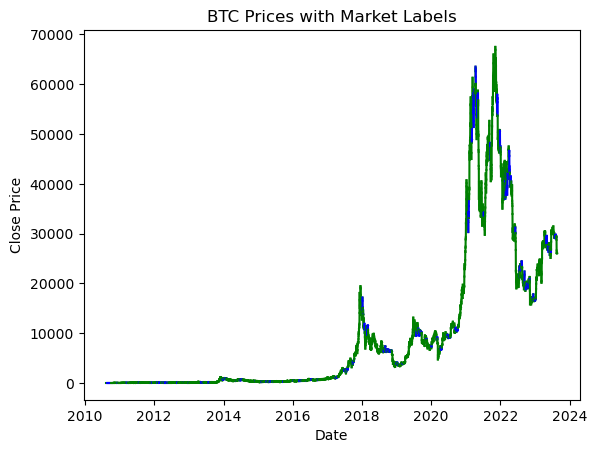

In [10]:
plot_colored_market_trends(df)

In [18]:
df['MarketLabel'].value_counts()

0    2921
1    1838
Name: MarketLabel, dtype: int64

In [24]:
X = df.drop(columns=["MarketLabel"])
y = df["MarketLabel"]

In [25]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [28]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

SVM Model 

In [36]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()

# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
print(svm_pred)

[0 0 0 ... 0 0 1]


In [39]:
accuracy_score(y_test, svm_pred)

0.8327731092436975

In [40]:
# Generate a confusion matrix for the model

confusion_matrix(y_test, svm_pred)

array([[712,  30],
       [169, 279]])

In [43]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       742
           1       0.90      0.62      0.74       448

    accuracy                           0.83      1190
   macro avg       0.86      0.79      0.81      1190
weighted avg       0.84      0.83      0.82      1190



In [44]:
# gradient bosting - Haywar 
# neural network - Nariman 
# logistic regressionaccuracy_score(y_test, predictions) - Ramees 
# random forest - Ramees 
# LSM models  - Vishnu 
